In [8]:
import numpy as np
import pickle
import math
from scipy.stats import sem
import matplotlib.pyplot as plt
import pandas as pd
import time
import pprint
import seaborn as sns
import statsmodels.formula.api as smf
import CMR_IA as cmr
import scipy as sp
from matplotlib.lines import Line2D
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 16

In [9]:
with open("simu2_data/simu2_design.pkl", 'rb') as inp:
    df_study = pickle.load(inp)
    df_test = pickle.load(inp)
df_study = df_study.query("session < 100")
df_test = df_test.query("session < 100")

In [10]:
df_study

,subject,list,itemno,study_pos,session
0,50,0,1328,1,0
1,50,0,768,2,0
2,50,0,518,3,0
3,50,0,21,4,0
4,50,0,914,5,0
...,...,...,...,...,...
38395,57,5,118,60,99
38396,57,5,1138,61,99
38397,57,5,176,62,99
38398,57,5,479,63,99


In [11]:
df_test

,subject,list,recog_pos,itemno,old,old_lag,study_pos,study_lag,session
0,50,0,1,490,True,-999,52,13,0
1,50,0,2,541,True,9,61,5,0
2,50,0,3,1066,False,-999,-99,-9999,0
3,50,0,4,942,True,-999,34,34,0
4,50,0,5,1464,False,-999,-99,-9999,0
...,...,...,...,...,...,...,...,...,...
76795,57,5,124,1457,False,-999,-99,-9999,99
76796,57,5,125,1208,False,-999,-99,-9999,99
76797,57,5,126,77,True,-999,43,147,99
76798,57,5,127,1116,True,21,64,127,99


### Run CMR-IA

In [12]:
s_mat = np.load("simu2_data/simu2_smat.npy")
# s_mat = np.identity(np.max(df.itemno)) # identity semantic matrix
# s_mat

In [13]:
params = cmr.make_default_params()
params.update(
    beta_enc = 0.4,
    beta_cue = 0.4,
    beta_distract = 0.9,
    beta_rec_post = 0.9,
    gamma_fc = 0.05,
    s_fc = 0.9,
    # c_thresh_itm = 0.377,
)
params

{'beta_enc': 0.4,
 'beta_rec': 0.5,
 'beta_cue': 0.4,
 'beta_rec_post': 0.9,
 'beta_distract': 0.9,
 'phi_s': 2,
 'phi_d': 0.5,
 's_cf': 0,
 's_fc': 0.9,
 'kappa': 0.5,
 'eta': 0.5,
 'omega': 5,
 'alpha': 1,
 'c_thresh': 0.5,
 'c_thresh_itm': 0.5,
 'c_thresh_ass': 0.5,
 'd_ass': 1,
 'lamb': 0.5,
 'rec_time_limit': 60000.0,
 'dt': 10,
 'nitems_in_accumulator': 50,
 'max_recalls': 50,
 'learn_while_retrieving': False,
 'a': 2800,
 'b': 20,
 'm': 0,
 'n': 1,
 'c1': 0,
 'thresh_sigma': 0,
 'No_recall': None,
 'var_enc': 1,
 'bad_enc_ratio': 1,
 'gamma_fc': 0.05,
 'gamma_cf': 0.5,
 'use_new_context': False}

In [14]:
df_simu = cmr.run_norm_recog_multi_sess(params,df_study,df_test,s_mat)
df_simu

CMR Time: 157.11223816871643


,session,itemno,s_resp,s_rt,csim
0,0,490,0.0,48.667191,0.297382
1,0,541,0.0,1237.234253,0.459163
2,0,1066,1.0,936.951660,0.554737
3,0,942,1.0,251.952301,0.620407
4,0,1464,1.0,137.008545,0.650867
...,...,...,...,...,...
76795,99,1457,1.0,94.111290,0.669645
76796,99,1208,1.0,107.093605,0.663184
76797,99,77,1.0,96.112183,0.668593
76798,99,1116,1.0,68.290894,0.685680


In [15]:
df_simu = df_simu.merge(df_test,on=['session', 'itemno'])
df_simu

,session,itemno,s_resp,s_rt,csim,subject,list,recog_pos,old,old_lag,study_pos,study_lag
0,0,490,0.0,48.667191,0.297382,50,0,1,True,-999,52,13
1,0,541,0.0,1237.234253,0.459163,50,0,2,True,9,61,5
2,0,1066,1.0,936.951660,0.554737,50,0,3,False,-999,-99,-9999
3,0,942,1.0,251.952301,0.620407,50,0,4,True,-999,34,34
4,0,1464,1.0,137.008545,0.650867,50,0,5,False,-999,-99,-9999
...,...,...,...,...,...,...,...,...,...,...,...,...
76795,99,1457,1.0,94.111290,0.669645,57,5,124,False,-999,-99,-9999
76796,99,1208,1.0,107.093605,0.663184,57,5,125,False,-999,-99,-9999
76797,99,77,1.0,96.112183,0.668593,57,5,126,True,-999,43,147
76798,99,1116,1.0,68.290894,0.685680,57,5,127,True,21,64,127


In [16]:
df_simu.to_pickle("simu2_data/simu2_result.pkl")

### ROC

In [17]:
with open("simu2_data/simu2_result.pkl", 'rb') as inp:
    df_simu = pickle.load(inp)

In [18]:
def conditions(s):
    if s.old_lag == -999:
        return np.nan
    elif np.absolute(s.old_lag) == 1:
        return 'a'
    elif np.absolute(s.old_lag) > 10:
        return 'r'
    else:
        return np.nan
df_simu['lag_cat'] = df_simu.apply(conditions, axis=1)
df_simu

,session,itemno,s_resp,s_rt,csim,subject,list,recog_pos,old,old_lag,study_pos,study_lag,lag_cat
0,0,490,0.0,48.667191,0.297382,50,0,1,True,-999,52,13,NaN
1,0,541,0.0,1237.234253,0.459163,50,0,2,True,9,61,5,NaN
2,0,1066,1.0,936.951660,0.554737,50,0,3,False,-999,-99,-9999,NaN
3,0,942,1.0,251.952301,0.620407,50,0,4,True,-999,34,34,NaN
4,0,1464,1.0,137.008545,0.650867,50,0,5,False,-999,-99,-9999,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
76795,99,1457,1.0,94.111290,0.669645,57,5,124,False,-999,-99,-9999,NaN
76796,99,1208,1.0,107.093605,0.663184,57,5,125,False,-999,-99,-9999,NaN
76797,99,77,1.0,96.112183,0.668593,57,5,126,True,-999,43,147,NaN
76798,99,1116,1.0,68.290894,0.685680,57,5,127,True,21,64,127,r


In [19]:
for i in range(1, len(df_simu)):
    if df_simu.loc[i, 'old'] == False and df_simu.loc[i-1, 'old'] == True:
        df_simu.loc[i, 'lag_cat'] = df_simu.loc[i-1, 'lag_cat']
df_simu

,session,itemno,s_resp,s_rt,csim,subject,list,recog_pos,old,old_lag,study_pos,study_lag,lag_cat
0,0,490,0.0,48.667191,0.297382,50,0,1,True,-999,52,13,NaN
1,0,541,0.0,1237.234253,0.459163,50,0,2,True,9,61,5,NaN
2,0,1066,1.0,936.951660,0.554737,50,0,3,False,-999,-99,-9999,NaN
3,0,942,1.0,251.952301,0.620407,50,0,4,True,-999,34,34,NaN
4,0,1464,1.0,137.008545,0.650867,50,0,5,False,-999,-99,-9999,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
76795,99,1457,1.0,94.111290,0.669645,57,5,124,False,-999,-99,-9999,r
76796,99,1208,1.0,107.093605,0.663184,57,5,125,False,-999,-99,-9999,NaN
76797,99,77,1.0,96.112183,0.668593,57,5,126,True,-999,43,147,NaN
76798,99,1116,1.0,68.290894,0.685680,57,5,127,True,21,64,127,r


In [20]:
df_t = df_simu.loc[pd.notna(df_simu.lag_cat)].copy()
df_t

,session,itemno,s_resp,s_rt,csim,subject,list,recog_pos,old,old_lag,study_pos,study_lag,lag_cat
6,0,1163,1.0,82.407898,0.676285,50,0,7,True,13,25,46,r
7,0,851,1.0,50.053658,0.701214,50,0,8,True,25,50,22,r
34,0,1491,1.0,98.261452,0.667487,50,0,35,True,44,46,53,r
35,0,1076,1.0,71.812180,0.683166,50,0,36,True,-22,24,76,r
36,0,37,1.0,53.330025,0.698044,50,0,37,True,29,53,48,r
...,...,...,...,...,...,...,...,...,...,...,...,...,...
76785,99,763,1.0,84.990219,0.674742,57,5,114,False,-999,-99,-9999,r
76794,99,911,1.0,72.485451,0.682699,57,5,123,True,-11,20,167,r
76795,99,1457,1.0,94.111290,0.669645,57,5,124,False,-999,-99,-9999,r
76798,99,1116,1.0,68.290894,0.685680,57,5,127,True,21,64,127,r


In [21]:
create_level = {0:"new_r", 1:"new_a", 2:"old_r", 3:"old_a"}
df_t['level'] = df_t.apply(lambda x: create_level[x['old'] * 2 + (x['lag_cat'] == 'a')], axis = 1)
df_t

,session,itemno,s_resp,s_rt,csim,subject,list,recog_pos,old,old_lag,study_pos,study_lag,lag_cat,level
6,0,1163,1.0,82.407898,0.676285,50,0,7,True,13,25,46,r,old_r
7,0,851,1.0,50.053658,0.701214,50,0,8,True,25,50,22,r,old_r
34,0,1491,1.0,98.261452,0.667487,50,0,35,True,44,46,53,r,old_r
35,0,1076,1.0,71.812180,0.683166,50,0,36,True,-22,24,76,r,old_r
36,0,37,1.0,53.330025,0.698044,50,0,37,True,29,53,48,r,old_r
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76785,99,763,1.0,84.990219,0.674742,57,5,114,False,-999,-99,-9999,r,new_r
76794,99,911,1.0,72.485451,0.682699,57,5,123,True,-11,20,167,r,old_r
76795,99,1457,1.0,94.111290,0.669645,57,5,124,False,-999,-99,-9999,r,new_r
76798,99,1116,1.0,68.290894,0.685680,57,5,127,True,21,64,127,r,old_r


<Axes: xlabel='csim', ylabel='Probability'>

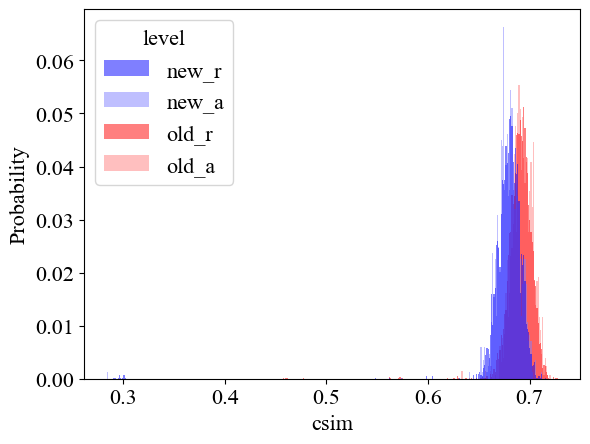

In [22]:
sns.histplot(data=df_t, x="csim", hue = "level", hue_order = ["new_r", "new_a", "old_r", "old_a"], palette = [[0,0,1],[0.5,0.5,1],[1,0,0],[1,0.5,0.5]], stat = "probability", common_norm = False,edgecolor=None)
# plt.savefig('fig/simu2_csim.pdf')

In [23]:
thresh_arr = np.arange(0,1,0.002)
df_th = df_t.loc[:,['csim','level','session']]
df_roc = pd.DataFrame()
for t in thresh_arr:
    df_th['above'] = df_th.csim > t
    tmp = df_th.groupby(["session", "level"]).above.mean().to_frame(name='above_m') 
    tmp2 = tmp.groupby("level").above_m.mean()
    # print(tmp)
    # print(tmp2)
    df_roc = pd.concat([df_roc,tmp2],axis=1,ignore_index=True)
df_roc = df_roc.transpose()
df_roc

,new_a,new_r,old_a,old_r
0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0
...,...,...,...,...
495,0.0,0.0,0.0,0.0
496,0.0,0.0,0.0,0.0
497,0.0,0.0,0.0,0.0
498,0.0,0.0,0.0,0.0


In [24]:
# df_roc_plot = df_roc.query("0.05 < old_a < 0.95 and 0.05 < old_r < 0.95")
# df_roc_plot

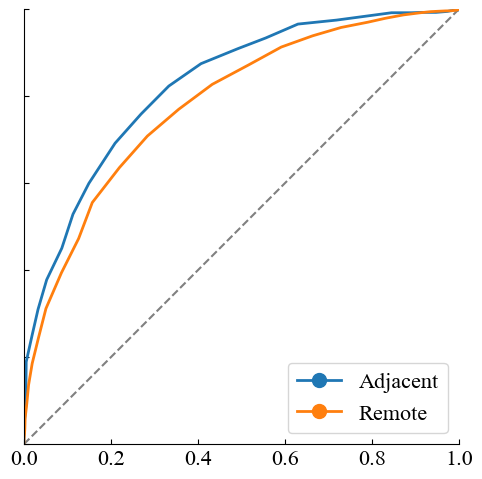

In [25]:
fig, ax = plt.subplots(figsize = (5,5))
fig.subplots_adjust(left=0.1, right=0.97, bottom=0.1, top=0.97)

ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
x = np.array([0,1])
y = np.array([0,1])
ax.plot(x,y,color='grey',linestyle='dashed')
sns.lineplot(data=df_roc, x="new_a", y = "old_a", marker = None, ax=ax, estimator = None, label = 'adjacent', linewidth = 2)
sns.lineplot(data=df_roc, x="new_r", y = "old_r", marker = None, ax=ax, estimator = None, label = 'remote', linewidth = 2)
plt.ylim([0,1])
plt.xlim([0,1])
plt.xlabel("False Alarm Rate")
plt.ylabel("Hit Rate")
ticks = np.array([0,0.2,0.4,0.6,0.8,1])
plt.xticks(ticks=ticks)
plt.yticks(ticks=ticks)
ax.set(xlabel=None, ylabel=None)
plt.tick_params(labelleft=False)
legend_elements = [Line2D([0], [0], color = sns.color_palette()[0], lw=2, marker='o', markersize = 10, linestyle='-',label = 'Adjacent'),
                   Line2D([0], [0], color = sns.color_palette()[1], lw=2, marker='o', markersize = 10, linestyle='-', label = 'Remote')]
plt.legend(handles = legend_elements, loc="lower right")

# plt.savefig('simu2_fig/simu2_roc.pdf')
plt.show()

In [26]:
df_zroc = pd.DataFrame()
df_zroc['z_new_a'] = sp.stats.norm.ppf(df_roc['new_a'])
df_zroc['z_new_r'] = sp.stats.norm.ppf(df_roc['new_r'])
df_zroc['z_old_a'] = sp.stats.norm.ppf(df_roc['old_a'])
df_zroc['z_old_r'] = sp.stats.norm.ppf(df_roc['old_r'])
df_zroc

,z_new_a,z_new_r,z_old_a,z_old_r
0,inf,inf,inf,inf
1,inf,inf,inf,inf
2,inf,inf,inf,inf
3,inf,inf,inf,inf
4,inf,inf,inf,inf
...,...,...,...,...
495,-inf,-inf,-inf,-inf
496,-inf,-inf,-inf,-inf
497,-inf,-inf,-inf,-inf
498,-inf,-inf,-inf,-inf


In [27]:
df_zroc_plot = df_zroc.query("-2.5 < z_new_a < 2.5 and -2.5 < z_new_r < 2.5 and -2.5 < z_old_a < 2.5 and -2.5 < z_old_r < 2.5")
df_zroc_plot

,z_new_a,z_new_r,z_old_a,z_old_r
333,1.370656,1.337292,2.435189,2.385658
334,1.231168,1.138568,2.396540,2.219157
335,1.015143,0.958924,2.396540,2.034729
336,0.830741,0.809082,2.174706,1.881138
337,0.578378,0.609967,1.956376,1.726165
338,0.331645,0.422845,1.820524,1.544148
339,0.140368,0.231649,1.503993,1.358583
340,-0.020429,0.040000,1.335632,1.133448
341,-0.235290,-0.169048,1.148593,0.942725
342,-0.431531,-0.369509,0.927620,0.738354


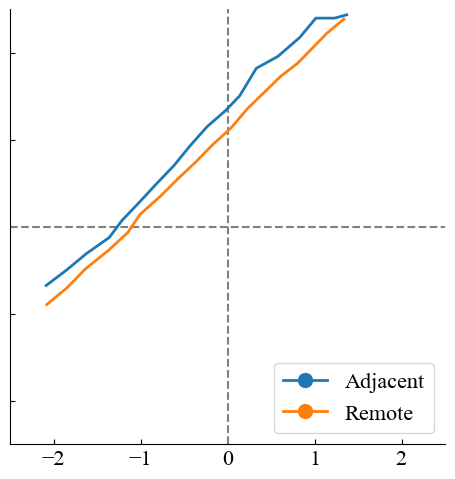

In [28]:
fig, ax = plt.subplots(figsize = (5,5))
fig.subplots_adjust(left=0.1, right=0.97, bottom=0.1, top=0.97)

ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
plt.axvline(x = 0, color='grey',linestyle='dashed')
plt.axhline(y = 0, color='grey',linestyle='dashed')
sns.lineplot(data=df_zroc_plot, x="z_new_a", y = "z_old_a", marker = None, ax=ax, estimator = None, label = 'adjacent', linewidth = 2)
sns.lineplot(data=df_zroc_plot, x="z_new_r", y = "z_old_r", marker = None, ax=ax, estimator = None, label = 'remote', linewidth = 2)
# sns.lineplot(data=df_zroc.loc[(df_zroc.z_new_a < 2) & (-2 < df_zroc.z_new_a)], x="z_new_a", y = "z_old_a", marker = None, ax=ax, estimator = None, label = 'adjacent', linewidth = 2)
# sns.lineplot(data=df_zroc.loc[(df_zroc.z_new_r < 2) & (-2 < df_zroc.z_new_r)], x="z_new_r", y = "z_old_r", marker = None, ax=ax, estimator = None, label = 'remote', linewidth = 2)
plt.ylim([-2.5,2.5])
plt.xlim([-2.5,2.5])
plt.xlabel("False Alarm Rate")
plt.ylabel("Hit Rate")
ax.set(xlabel=None, ylabel=None)
plt.tick_params(labelleft=False)
legend_elements = [Line2D([0], [0], color = sns.color_palette()[0], lw=2, marker='o', markersize = 10, linestyle='-',label = 'Adjacent'),
                   Line2D([0], [0], color = sns.color_palette()[1], lw=2, marker='o', markersize = 10, linestyle='-', label = 'Remote')]
plt.legend(handles = legend_elements, loc="lower right")

# plt.savefig('simu2_fig/simu2_zroc.pdf')
plt.show()